In [1]:
#Part 1
import numpy as np
from tensorflow.keras.datasets import cifar10

from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import pairwise_distances
from validclust import dunn

#Part 2 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers, losses
from tensorflow.keras.models import Model


PART 1: Implement K-Means Clustering

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
print("Train Dataset shape:", x_train.shape, y_train.shape)
print("Test Dataset shape:", x_test.shape, y_test.shape)

Train Dataset shape: (50000, 32, 32, 3) (50000, 1)
Test Dataset shape: (10000, 32, 32, 3) (10000, 1)


In [4]:
features = x_test.reshape(10000,3072)
features.shape

(10000, 3072)

In [5]:
def kmeans(x,k, no_of_iterations):
    rand_pt = np.random.choice(len(x), k, replace=False)
    #Choosing a point randomly for the centroid 
    centroids = x[rand_pt, :]
      
    #Finding euclidean distance between the points and the centroid
    distances = cdist(x, centroids ,'euclidean')
     
    #Centroid with the minimum distance
    points = np.array([np.argmin(i) for i in distances]) 
    count = 0

    for _ in range(no_of_iterations): 
        centroids = []
        
        #Count for number of iterations performed.
        count += 1
        print(count)
        for rand_pt in range(k):
            #Updating Centroids by taking mean of the Cluster it belongs to
            int_centroid = x[points==rand_pt].mean(axis=0) 
            centroids.append(int_centroid)
 
        centroids = np.vstack(centroids)
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points

In [6]:
#K-Means application

label = kmeans(features,10,200)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [7]:
dist = pairwise_distances(features)
print("The Silhouette Coefficient: ", silhouette_score(features,label) )
print("Dunn's Index: ",dunn(dist, label))

The Silhouette Coefficient:  0.05750582597809426
Dunn's Index:  0.1200389343684522


Part 2: Implement Auto Encoder.

In [8]:
#Normalizing the training data and the test data
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
# Convolutional Auto Encoder Model

input_imgs = keras.Input(shape = (32,32,3), name = 'Input')

#encoder
e1 = layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same', strides = 2, name = 'encoder_layer_1')(input_imgs)
encoded = layers.Conv2D(8, (3, 3), activation = 'relu', padding = 'same', strides = 2, name = 'encoded')(e1)


#decoder
d1 = layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same', name = 'decoder_layer_1')(encoded)
d2 = layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same', name = 'decoder_layer_2')(d1)
decoded = layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same', name = 'decoded')(d2)


In [10]:
#change above neurons to 3 or just switch back to auto
#compiling the model
autoencoder = keras.Model(input_imgs,decoded)
autoencoder.compile(optimizer = 'adam', loss = losses.MeanSquaredError())
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
encoder_layer_1 (Conv2D)     (None, 16, 16, 16)        448       
_________________________________________________________________
encoded (Conv2D)             (None, 8, 8, 8)           1160      
_________________________________________________________________
decoder_layer_1 (Conv2DTrans (None, 16, 16, 16)        1168      
_________________________________________________________________
decoder_layer_2 (Conv2DTrans (None, 32, 32, 32)        4640      
_________________________________________________________________
decoded (Conv2D)             (None, 32, 32, 3)         867       
Total params: 8,283
Trainable params: 8,283
Non-trainable params: 0
___________________________________________________________

In [11]:
#training of the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size = 128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
391/391 [==============================] - 82s 209ms/step - loss: 0.0153 - val_loss: 0.0056
Epoch 2/5
391/391 [==============================] - 80s 206ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 3/5
391/391 [==============================] - 81s 208ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 4/5
391/391 [==============================] - 71s 181ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 5/5
391/391 [==============================] - 68s 173ms/step - loss: 0.0035 - val_loss: 0.0032


In [12]:
#compiling encoder model to get the encoded output 
#for kmeans clustering input

encoder = Model(autoencoder.input, autoencoder.layers[-4].output)
encoder.summary()

encoded_imgs = encoder.predict(x_train)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
encoder_layer_1 (Conv2D)     (None, 16, 16, 16)        448       
_________________________________________________________________
encoded (Conv2D)             (None, 8, 8, 8)           1160      
Total params: 1,608
Trainable params: 1,608
Non-trainable params: 0
_________________________________________________________________


In [13]:
encoded_imgs.shape

(50000, 8, 8, 8)

In [14]:
en_features = encoded_imgs.reshape(50000,512)
en_features.shape

(50000, 512)

In [15]:
#applying K-Means with encoded images as input 
en_label = kmeans(en_features,10,100)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [16]:
print("The Silhouette Coefficient: ", silhouette_score(en_features,en_label))

The Silhouette Coefficient:  0.060681798


In [17]:
#Extra for printing decoded images

decoded_imgs = autoencoder.predict(x_train)

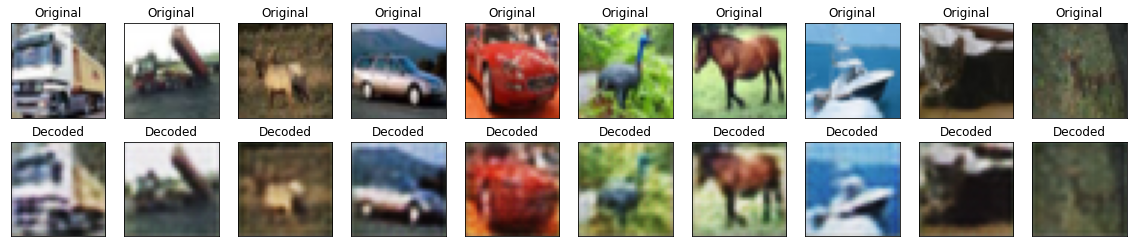

In [18]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.title("Original")
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Decoded")
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()